**Support Vector Machines**  are one of the best machine learning methods when getting the correct answer is a higher priorty than understanding why you get the correct answer. 

They work really well with relatively small datasets and they do not require much optimization.

This code file will cover: -

• **Importing Data from a File**

• **Missing Datà**
    • identifying Missing Data
    • Dealing with Missing Data
    
• **Downsampling Data**

• **Formatting the Data for Support Vector Machines**
    • Splitting data into Dependent and Independent Variables
    • One-Hot-Encoding
    • Centering and Scaling the Data

• **Building a Preliminary Support Vector Machine**

• **Opimizing Parameters with Cross Validation**
    • Using Cross Validation to find the best Values for Gamma and Regularization
    
• **Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine**


**Datasource: -** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into training and test set
from sklearn.preprocessing import scale # scale and center data 
from sklearn.svm import SVC # this will make a support vector machine for classification.
from sklearn.model_selection import GridSearchCV # this will do cross validation 
from sklearn.metrics import confusion_matrix #this creates a confusiion matrix 
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [2]:
df=pd.read_excel("/Users/ashutoshsingh/Downloads/default of credit card clients.xls",header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.rename({'default payment next month':'DEFAULT'}, axis=1, inplace=True)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.drop('ID',axis=1, inplace=True)

In [7]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

• **LIMIT_BAL**, The amount of available credit Integer

• **SEX, Category**
    • 1 = male
    •2 = female
 
• **EDUCATION, Category**
    • 1 = graduate school
    • 2 = university
    • 3 = high school
    • 4 = others
    
• **MARRIAGE, Category**
    • 1 = Married
    • 2 = Single
    • 3 = Other
    
• **AGE, Integer**

• **PAY_** When the last 6 bills were payed **Category**
    • -1 s Paid on time                                               
    • 1 = Payment delayed by 1 month                                
    • 2 = Payment delayed by 2 months                                 
    ....                                                               
    • 8 = Payment delayed by 8 months                                   
    • 9 = Payment delayed by 9 or more months
    
• **BILL AMT**, What the last 6 bils were **integer**
• **PAY AMT**, How Anuch the last payments were **integer**
* **DEFAULT**, Whether or not a person defaulted on the next payment **CATEGORY**
    • 0 = Did not detaut
    • 1 = detaulted

In [9]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [10]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [11]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [12]:
df_no_missing = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE'] != 0)]

In [13]:
len(df_no_missing)

29932

In [14]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [15]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

**Downsample the data**

**Support Vector Machines** are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with Cross Validation. So we'll downsample both categories, customers who did and did not default, to 1.000 each.
First, let's remind ourselves how many customers are in the dataset...

In [16]:
len(df_no_missing)

29932

**29,932 samples** is a relatively large number for a Support Vector Machine, so let's downsample. To make sure we get
**1,000 of each category**, we start by splitting the data into two dataframes, one for people that did not default and one for people that did.

In [17]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

Now downsample the dataset that did not default

In [18]:
from sklearn.utils import resample

In [19]:
df_no_default_downsampled = resample(df_no_default,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)
len(df_no_default_downsampled)

1000

Now downsample the dataset that defaulted

In [20]:
df_default_downsampled = resample(df_default,
                                     replace=False,
                                     n_samples=1000,
                                     random_state=42)
len(df_default_downsampled)

1000

Now let's merge the two downsampled datasets into a single dataframe and print out the total number of samples to make sure everything is hunky dory.

In [21]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [22]:
df_downsample.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,...,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,...,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,81778,83082,84811,3300,3331,3359,2663,2751,3000,0


In [23]:
df_downsample.shape

(2000, 24)

# Format Data Part 1: Split the Data into Dependent and Independent Variables

Now that we have taken care of the missing data, we are ready to start formatting the data for making a **Support Vector Machine.**

The first step is to split the data into two parts:

    1. The columns of data that we will use to make classifications
    2. The column of data that we want to predict.
    
We will use the conventional notation of X (capital X) to represent the columns of data that we will use to make classifications and y (lower case y) to represent the thing we want to predict. 
In this case, we want to predict default (whether or not someone defaulted on a payment).

**NOTE:** The reason we deal with missing data before splitting it into that each row in X correctly corresponds with the appropriate value in y.

**NOTE:** In the code below we are using copy () to copy the data by value. By default, pandas uses copy by reference. Using copy () ensures that the original data df_downsample is not modified when we modify X or y. 

In [24]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [25]:
y=df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

# Format the Data Part 2: One-Hot Encoding

Now that we have split the data frame into two pieces, X, which contains the data we will use to make, or predict, classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variables in X. The list bellow tells us what each variable represents and the type of data (Int or Categorical) it should contain:

• **SEX, Category**                                    
    • 1 = male                                                   
    • 2 = female
    
• **EDUCATION, Category**                             
    • 1 = graduate school                                  
    • 2 = university                                             
    • 3 = high school                                       
    • 4 = others
    
• **MARRIAGE, Category**                                                
    • 1 = Married                                                     
    • 2 = Single                                                    
    • 3 = Other
    
• **PAY_** When the last 6 bills were payed **Category**
    • -1 s Paid on time                                               
    • 1 = Payment delayed by 1 month                                
    • 2 = Payment delayed by 2 months                                 
    ....                                                                
    • 8 = Payment delayed by 8 months                                   
    • 9 = Payment delayed by 9 or more months
    
Scikit-learn doesn't support categorical variables. So above variables need to be changed. But what's the issue in treating these variables as continuous?

If we treated these values, 1, 2, and 3, like continuous data, then we would assume that 3, which means "Other', is more similar to 2, which means "Single*, than it is to 1, which means "Married*. That means the support vector machine would be more likely to cluster the people with 3s and 2s together than the people with 3s and 1s together. In contrast, if we treat these numbers like categorical data, then we treat each one as a separate category that is no more or less similar to any of the other categories. Thus, the likelihood of clustering people with 3s with 2s is the same as clustering 3s with 1s, and that approach is more reasonable.

There are lots of ways to one hot encoding and we're using **get_dummies** here from **pandas**.  Another menthod is column_transformer from **scikit-learn**.

In [26]:
pd.get_dummies(X, columns=['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


In [27]:
#converting all columns together
X_encoded = pd.get_dummies(X, columns= ['SEX',
                                        'EDUCATION',
                                        'MARRIAGE',
                                        'PAY_0',
                                        'PAY_2',
                                        'PAY_3',
                                        'PAY_4',
                                        'PAY_5',
                                        'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


# Format the Data Part 3: Centering and Scaling

The **Radial Basis Function (RBF)** that we are using with our Support Vector Machine assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both the training and testing datasets.

**NOTE:** We split the data into training and testing datasets and then scale them separately to avoid **Data Leakage.** Data Leakage occurs when information about the training dataset currupts or influences the testing dataset.

In [28]:
from sklearn.preprocessing import scale # scale and center data 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train) #after split we're scaling the dataset using scale function
X_test_scaled = scale(X_test) # scaling dataset using scale function

# Build A Preliminary Support Vector Machine

In [30]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

Normalized confusion matrix
[[201  56]
 [ 95 148]]


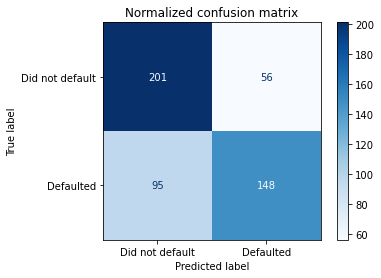

In [54]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=["Did not default", "Defaulted"],
        cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

In the confusion matrix, we see that of the **257 people** that did not default, **201 (79%)** were correctly classified. And of the **243 people** that defaulted, **148 (61%)** were correctly classified. So the **Support Vector Machine** was not awesome. So let's try to improve predictions using **Cross Validation** to optimize the parameters.

# Optimize Parameters with Cross Validation and GridSearchCV)

Optimizing a Support Vector Machine is all about finding the best value for **gamma,** and, potentially, the **regularization parameter, C**. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the Testing Dataset.

Since we have two parameters to optimize, we will use GridSearch(CV). We specify a bunch of potential values for gamma and C, and GridSearchCV() tests all possible combinations of the parameters for us.

In [64]:
param_grid = [
{'C': [0.5, 1, 10, 100], # NOTE: Values for C must be>0
'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
'kernel': ['rbf']},
]
## NOTE: We are including C=l and gamma='scale' 
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
    SVC(), 
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


And we see that the ideal value for **C is 100**, which means we will use regularization, and the ideal value for **gamma is 0.001**.

# Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine

Now that we have the ideal values for C and gamma we can build the final Support Vector Machine:

In [75]:
clf_svc = SVC(random_state=42, C=100, gamma=0.001)
clf_svc.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

Normalized confusion matrix
[[201  56]
 [ 95 148]]


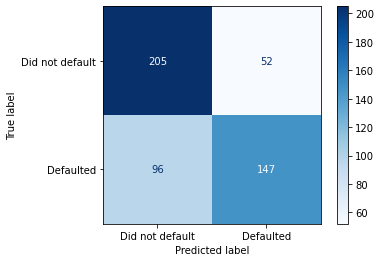

In [76]:
disp_new = ConfusionMatrixDisplay.from_estimator(
        clf_svc,
        X_test_scaled,
        y_test,
        display_labels=["Did not default", "Defaulted"],
        cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

And the results from the optimized Support Vector Machine are just a little bit better than before. 

4 more people were correctly classified as not defaulting and only 1 more person was incorrecity classified as defauting.

In other words, the SVM was pretty good straight out of the box without much optimization. This makes SVMs a great, quick and dirty method for relatively small datasets.

**NOTE:** Although classification with this dataset and an SVM is not awesome, it may be better than other methods. We'd have to compare to find out.

The last thing we are going to do is draw a support vector machine decision boundary and discuss how to interpret it.

The first thing we need to do is count the number of columns in X

In [77]:
len(df_downsample.columns)

24

So we see that there are 24 features, or columns, in X. This is a problem because it would require a 24-dimensional graph, one dimension per feature used to make predictions, to plot the data in its raw form. If we wanted to, we could just pick two features at random to use as x and y-axes on our graph, but instead, we will use **PCA (Principal Component Analysis)** to combine the 24 features into 2 orthogonal meta-features that we can use as axes for a graph. 

However, before we shrink the graph, let's first determine how accurate the shrunken graph will be. If it's relatively accurate, than it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drawing something called a **scree plot.**

**scree plot: -** In multivariate statistics, a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA). 

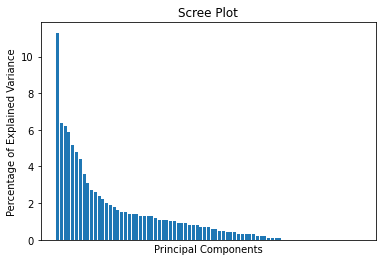

In [98]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len (per_var)+1)]

plt.bar(x=range (1, len (per_var)+1), height=per_var) 
plt.tick_params(axis='x', #changes apply to the x-axis
                which='both', #both major and minor ticks are affected
                bottom=False, #ticks along the bottom edge are off
                top=False, # ticks along the top edge are off
                labelbottom=False) #labels along the bottom edge are off 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title( 'Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. However, PC2 is not much different from PC3 or PC4, which doesn't bode well for dimension reduction. Since we don't have a choice, let's go with it, but don't be suprised if the final graph looks funky.

Now we will draw the PCA graph. let's optimize an SVM fit to PC1 and PC2.

In [99]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]
# NOTE:
# pcl contains the x-axis coordinates of the data after PCA
# pc2 contains the y-axis coordinates of the data after PCA

# Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

# Now we optimize the SVM fit to the x and y-axis 'coordinates 
# of the data after PCA dimension reduction.
param_grid = [
{'C': [0.5, 1, 10, 100], # NOTE: Values for C must be>0
'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
'kernel': ['rbf']},
]
## NOTE: We are including C=l and gamma='scale' 
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
    SVC(), 
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(pca_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


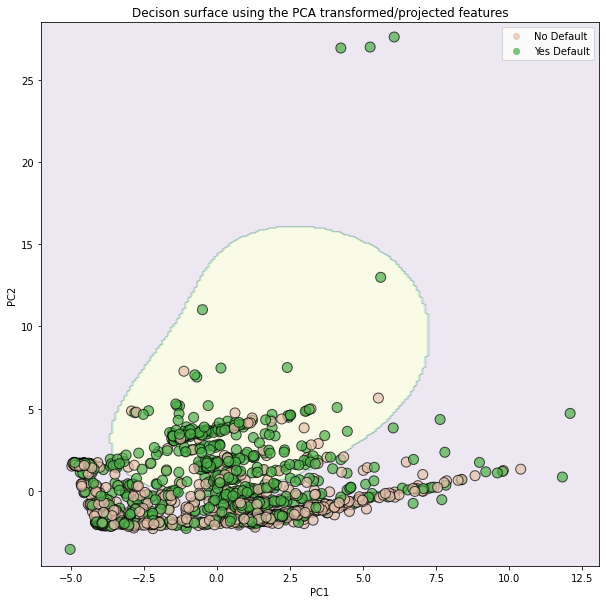

In [100]:
clf_svm = SVC(random_state=42, C=10, gamma=0.01)
clf_svm.fit(pca_train_scaled,y_train) 

## Transform the test dataset with the PCA..
X_test_pca = pca.transform(X_train_scaled)
#X_test_pca= pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show 
## the decision regions.
## The matrix will be a little bit larger than 
## the as transformed PCA points so that we can plot all of  
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))
##now we will classify every point in that
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other 
## side will get 1.

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which 
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) correspond
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
# now we will use contourf() to draw a filled contour plot
# using the matrix values and classifications.
# The contours will be filled according to' the
# predicted classifications (0s and Is) in 2
ax.contourf(xx, yy, Z, alpha=0.1)

# now create custom colors for the açtual data points
cmap = colors.ListedColormap(['#e4c1ac','#4daf4a'])

# now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha 8.7 lets us see if we are covering up a point
##scatter sax.scatter(test_pc_coords, test_pc2_coords, cay_test,
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                     cmap=cmap,
                     s=100,
                     edgecolors='k', ## k= black
                     alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")
# now. add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title("Decison surface using the PCA transformed/projected features")
plt. show()

The **pink part** of the graph is the area were all datapoints will be predicted to have **not defaulted**. The **yellow part** of the graph is the area where all datapoints will be predicted to **have defaulted**. The the dots are datapoints in the training dataset and are color coded by their known classifications: **peach is for those that did not default and green is for those that defaulted.**

**NOTE:** The results are shown the training data, not the testing data and thus, do not match the confusion matrices that we generated. Also, remember that for this picture, we only fit the SVM to the first two principal components instead of all the data, and thus, this is only an approximation of the true classifier. Lastly, because the skree plot showed that PC2 was not very different from PC3 or PC4, this is not a very good approximation.